cel ->  pogrupowanie danych które dotyczą pokrycia terenu w obszarach leśnych (zbiór Forest Covertypes) z wykorzystaniem uczenia nienadzorowanego - klasteryzacji

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA

In [3]:
#pobieranie danych
data = fetch_covtype(as_frame=True)
X = data.data

In [7]:
feature_names = data.feature_names
dane_dt = pd.DataFrame(X,columns=feature_names)
dane_dt.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2579.0,132.0,6.0,300.0,-15.0,67.0,230.0,237.0,140.0,6031.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2606.0,45.0,7.0,270.0,5.0,633.0,222.0,225.0,138.0,6256.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2605.0,49.0,4.0,234.0,7.0,573.0,222.0,230.0,144.0,6228.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2617.0,45.0,9.0,240.0,56.0,666.0,223.0,221.0,133.0,6244.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2612.0,59.0,10.0,247.0,11.0,636.0,228.0,219.0,124.0,6230.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#skalowanie danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
#redukcja wymiarowości
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [6]:
#klasteryzacja z MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=7,random_state=42,batch_size=1000)
clusters = kmeans.fit_predict(X_scaled)

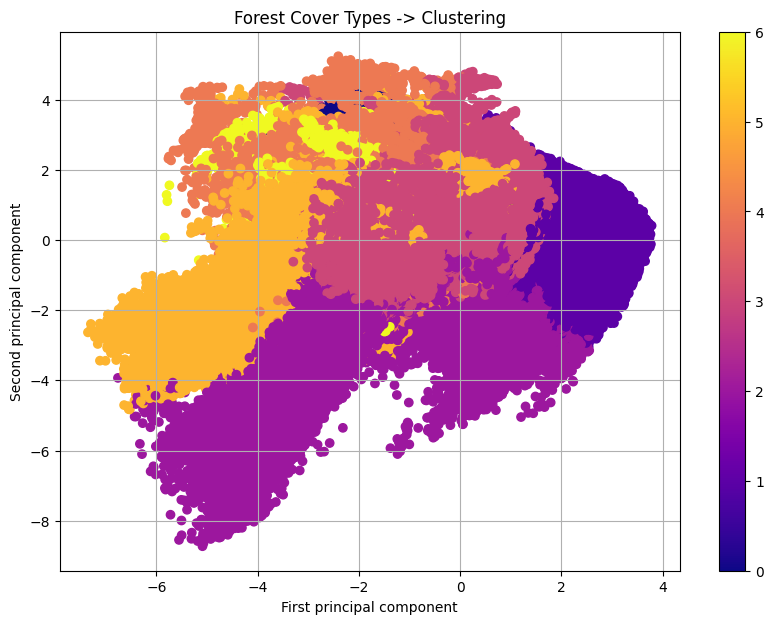

In [8]:
#wizualizacja
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0],X_pca[:,1],c=clusters,cmap="plasma")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("Forest Cover Types -> Clustering")
plt.grid(True)
plt.colorbar()
plt.show()

Szczegółowa ocena modelu

In [ ]:
#silhouette score
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_scaled,clusters)
print(f"silhouette score -> {sil_score:.4f}")

In [ ]:
#Calinski - Harabasz Index
from sklearn.metrics import calinski_harabasz_score
cal_score = calinski_harabasz_score(X_scaled,clusters)
print(f"Calinski - Harabasz Index -> {cal_score:.4f}")

In [ ]:
#Davies-Bouldin Index
from sklearn.metrics import davies_bouldin_score
dav_score = davies_bouldin_score(X_scaled,clusters)
print(f"Davies-Bouldin Index -> {dav_score:.4f}")

In [ ]:
#Adjusted Rand Index - ARI
#Normalized Mutual Information - NMI
from sklearn.metrics import adjusted_rand_score,normalized_mutual_info_score

true_labels = data.target
ari_score = adjusted_rand_score(true_labels,clusters)
nmi_score = normalized_mutual_info_score(true_labels,clusters)

print(f"Adjusted Rand Index -> {ari_score:.4f}")
print(f"Normalized Mutual Information -> {nmi_score:.4f}")

porownananie metod kalsteryzacji: MiniBatchKMeans, DBSCAN, Spectral Clustering oraz redukcji wymiarów: t-SNE, UMAP

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.cluster import DBSCAN, SpectralClustering, MiniBatchKMeans

# 1. Generowanie sztucznego zbioru danych
X, y_true = make_blobs(n_samples=10000, centers=5, cluster_std=0.60, random_state=0)

# 2. Skalowanie danych
X_scaled = StandardScaler().fit_transform(X)

# 3. Redukcja wymiarów

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# 4. Klasteryzacja

# MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=1000)
labels_kmeans = kmeans.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Spectral Clustering
spectral = SpectralClustering(n_clusters=5, assign_labels='kmeans', random_state=42, affinity='nearest_neighbors')
labels_spectral = spectral.fit_predict(X_scaled)

# 5. Zbiór wynikowy
df_viz = pd.DataFrame({
    'TSNE_1': X_tsne[:, 0],
    'TSNE_2': X_tsne[:, 1],
    'UMAP_1': X_umap[:, 0],
    'UMAP_2': X_umap[:, 1],
    'Label_KMeans': labels_kmeans,
    'Label_DBSCAN': labels_dbscan,
    'Label_Spectral': labels_spectral
})

# 6. Wizualizacja wyników

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# t-SNE
axs[0, 0].scatter(df_viz['TSNE_1'], df_viz['TSNE_2'], c=df_viz['Label_KMeans'], cmap='tab10', s=1)
axs[0, 0].set_title('t-SNE + KMeans')

axs[0, 1].scatter(df_viz['TSNE_1'], df_viz['TSNE_2'], c=df_viz['Label_DBSCAN'], cmap='tab10', s=1)
axs[0, 1].set_title('t-SNE + DBSCAN')

axs[0, 2].scatter(df_viz['TSNE_1'], df_viz['TSNE_2'], c=df_viz['Label_Spectral'], cmap='tab10', s=1)
axs[0, 2].set_title('t-SNE + Spectral')

# UMAP
axs[1, 0].scatter(df_viz['UMAP_1'], df_viz['UMAP_2'], c=df_viz['Label_KMeans'], cmap='tab10', s=1)
axs[1, 0].set_title('UMAP + KMeans')

axs[1, 1].scatter(df_viz['UMAP_1'], df_viz['UMAP_2'], c=df_viz['Label_DBSCAN'], cmap='tab10', s=1)
axs[1, 1].set_title('UMAP + DBSCAN')

axs[1, 2].scatter(df_viz['UMAP_1'], df_viz['UMAP_2'], c=df_viz['Label_Spectral'], cmap='tab10', s=1)
axs[1, 2].set_title('UMAP + Spectral')

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()
